In [2]:
from __phello__ import ham
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
!pip install xgboost

In [4]:
df=pd.read_csv("data/emails.csv")
df.drop(columns=["Email No."])

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,1


In [5]:
# Load and clean dataset
df = df.drop(columns=["Email No."])

# Separate features and label
X = df.drop(columns=["Prediction"])
y = df["Prediction"]

# Convert feature columns to float
X = X.astype(float)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [7]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

C:\ProgramData\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:35:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [8]:

y_pred = model.predict(X_test)

In [9]:
# Classification metrics
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       735
           1       0.95      0.97      0.96       300

    accuracy                           0.98      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.98      0.98      0.98      1035

[[720  15]
 [ 10 290]]


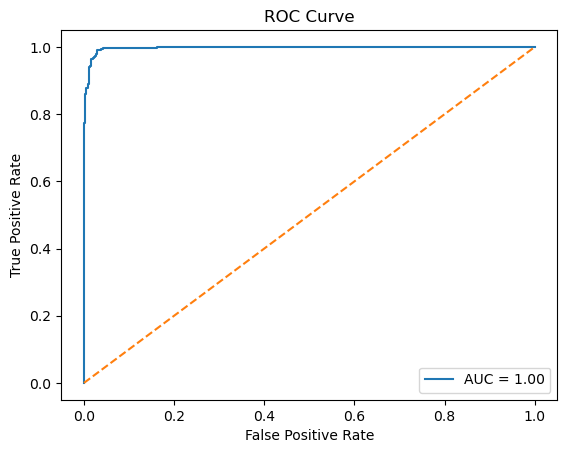

In [23]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()


Text(0.5, 1.0, 'Confusion Matrix')

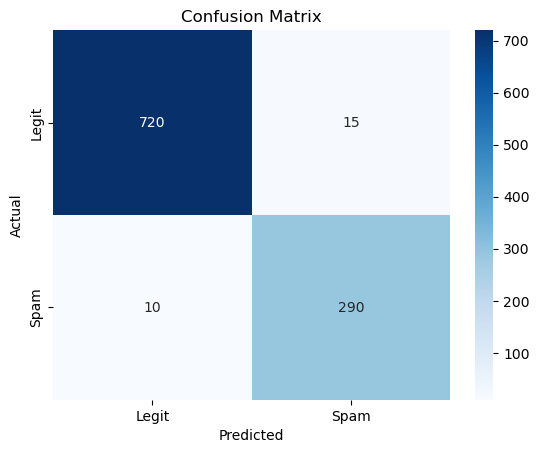

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Spam'], yticklabels=['Legit', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")


Text(0.5, 1.0, 'Top 20 Important Words in Email Classification')

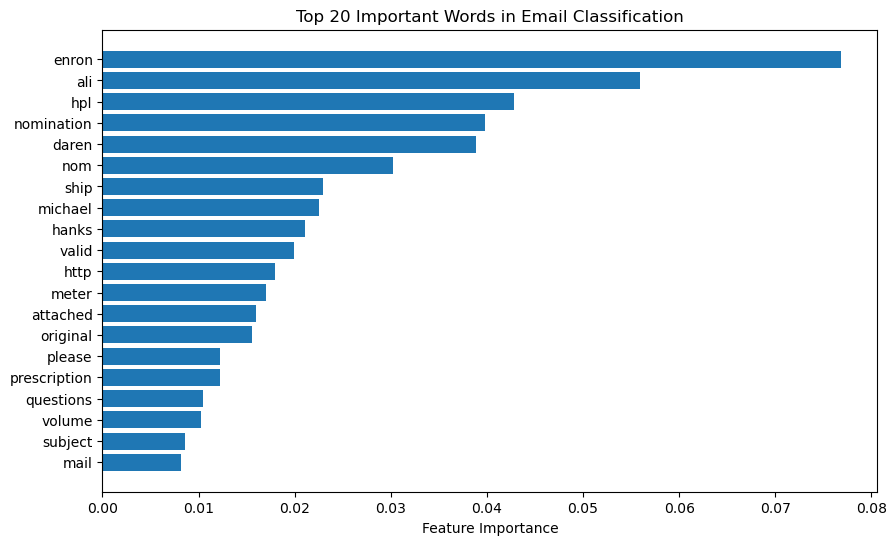

In [27]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X.columns

# Plot top 20 important features
sorted_idx = importances.argsort()[::-1][:20]
plt.figure(figsize=(10, 6))
plt.barh(range(20), importances[sorted_idx][::-1])
plt.yticks(range(20), feature_names[sorted_idx][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 20 Important Words in Email Classification")

In [38]:
from PIL import Image
import pytesseract
import re
from collections import Counter
import pandas as pd

# Link pytesseract to the actual Tesseract engine
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Load email screenshot image
img = Image.open("E:/Screenshot 2025-07-04 005941.png")

# Extract text from image using OCR
email_text = pytesseract.image_to_string(img)

print("📨 Extracted Email Text:\n", email_text)

# --- Now run your existing spam detection on email_text ---

# Tokenize and count word frequency
words = re.findall(r'\b\w+\b', email_text.lower())
word_freq = Counter(words)

# Match the Bag-of-Words format from training
input_bow = {word: word_freq.get(word, 0) for word in X.columns}
X_input = pd.DataFrame([input_bow])

# Predict spam or not
prediction = model.predict(X_input)
print("🧠 Prediction:", "🚫 Spam" if prediction[0] == 1 else "✅ Legit")


📨 Extracted Email Text:
 Share request for "Shhlok Rastogi [IITRPR_Al_25010990]_Admission_Letter.png" Inbox x

Hrige Srivastava (via Google Drive) <drive-shares-dm-noreply@qoogle com>
tome ©

Share an itern?

tH) Hrige Srivastava (stivastavahri ge@gmail.com) is requesting access to the
following item

BR Shniok Rastogi [ITRPR_AI_25010990]_Admission_Letter png

Editor +

Notify

Ifyou natiy the recipient, they will see your name and decision

Message

Google LLC, 1600 Amphitheatre Parkway, Mountain View, CA 94043, USK
‘ou have eceived this email hecause srivastavahrige@umailcom requested acvess toa += GOOgle™
file of folder located in Google Drive

4 Thu, Jul, 10:54AM (14 hours ago)

bd

🧠 Prediction: ✅ Legit
